## EDA

### Data Import & Initial Inspection

In [ ]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Use Pandas to create DataFrame from CSV
sales_df = pd.read_csv("Resources/retail_price_cleaned.csv")

sales_df.head()

,product_id,product_category_name,month_year,qty_sold,total_price,freight_price,unit_price,product_rating,no_customers,month,...,comp1_price,comp1_prod_rating,comp1_freight_price,comp2_price,comp2_prod_rating,comp2_freight_price,comp3_price,comp3_prod_rating,comp3_freight_price,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,4.0,57,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,4.0,61,6,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,4.0,123,7,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,4.0,90,8,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,4.0,54,9,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:
#Unique Names for Product Categories
sales_df["product_category_name"].unique()

array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

In [ ]:
#Unique Years in Dataset
sales_df["year"].unique()

array([2017, 2018], dtype=int64)

In [ ]:
#Sum of qty sold by product category
sale_vol_by_cat = sales_df.groupby(by=["product_category_name"])["qty_sold"].sum()

sale_vol_by_cat

product_category_name
bed_bath_table           1026
computers_accessories    1167
consoles_games            239
cool_stuff                558
furniture_decor           894
garden_tools             2398
health_beauty            1842
perfumery                 244
watches_gifts            1431
Name: qty_sold, dtype: int64

### Explore sales data per product category

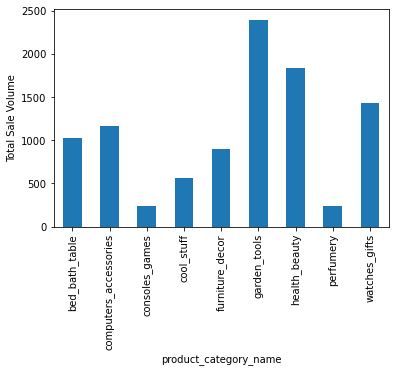

In [ ]:
#Total Sale Volume by Product Category
sale_vol_by_cat.plot.bar()
plt.ylabel("Total Sale Volume")

plt.show()

In [ ]:
#Number of Customers by Product Category
no_customer_by_cat = sales_df.groupby(by=["product_category_name"])["no_customers"].sum()

no_customer_by_cat

product_category_name
bed_bath_table            3313
computers_accessories     4807
consoles_games             439
cool_stuff                2168
furniture_decor           2495
garden_tools             17618
health_beauty            13765
perfumery                  427
watches_gifts             9743
Name: no_customers, dtype: int64

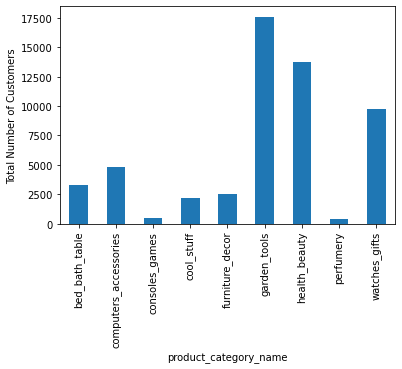

In [ ]:
#Number of Customers by Product Category Chart
no_customer_by_cat.plot.bar()
plt.ylabel("Total Number of Customers")

plt.show()

In [ ]:
#Sales Revenue by Product Category
sale_rev_by_cat = sales_df.groupby(by=["product_category_name"])["total_price"].sum()

sale_rev_by_cat

product_category_name
bed_bath_table            95084.52
computers_accessories    142097.95
consoles_games             5800.70
cool_stuff                57956.30
furniture_decor           56925.16
garden_tools             163582.54
health_beauty            212409.24
perfumery                 20312.52
watches_gifts            207582.17
Name: total_price, dtype: float64

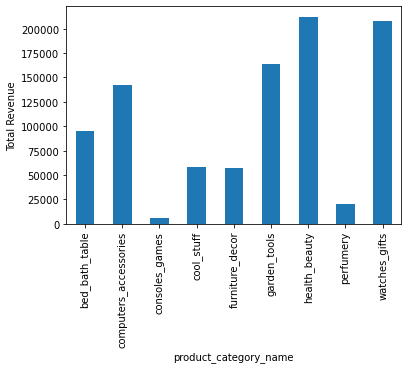

In [ ]:
#Sales Revenue by Product Category Bar Chart
sale_rev_by_cat.plot.bar()
plt.ylabel("Total Revenue")

plt.show()

In [ ]:
#Sales Data by Product Category
sales_data_by_category = pd.DataFrame(sales_df.groupby(["product_category_name"])[["qty_sold", "total_price", "no_customers"]].sum())

sales_data_by_category.head()

,qty_sold,total_price,no_customers
product_category_name,,,
bed_bath_table,1026,95084.52,3313
computers_accessories,1167,142097.95,4807
consoles_games,239,5800.70,439
cool_stuff,558,57956.30,2168
furniture_decor,894,56925.16,2495


In [ ]:
#Rename columns for cleaner visualization
sales_data_by_category = sales_data_by_category.rename(columns={"qty_sold": "Sales Volume", "total_price": "Revenue", "no_customers": "Number of Customers"})

sales_data_by_category.head()

,Sales Volume,Revenue,Number of Customers
product_category_name,,,
bed_bath_table,1026,95084.52,3313
computers_accessories,1167,142097.95,4807
consoles_games,239,5800.70,439
cool_stuff,558,57956.30,2168
furniture_decor,894,56925.16,2495


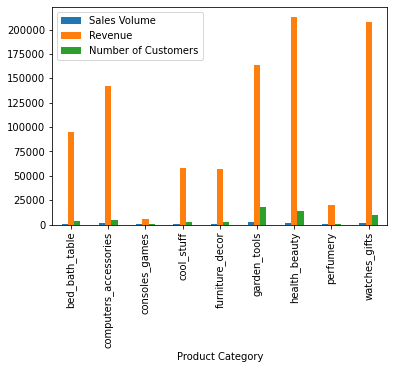

In [ ]:
#Sales Data by Product Category Bar Chart
sales_data_by_category.plot.bar()

plt.xlabel("Product Category")

plt.show()

#### Categories with the highest Sales Volume, Revenue, Number of Customers:
- garden_tools
- health_beauty
- watches_gifts

In [ ]:
avg_rating_by_cat = sales_df.groupby(by=["product_category_name"])["product_rating"].mean()

avg_rating_by_cat

product_category_name
bed_bath_table           3.908197
computers_accessories    3.985507
consoles_games           4.063636
cool_stuff               4.207018
furniture_decor          3.979167
garden_tools             4.161875
health_beauty            4.145385
perfumery                4.350000
watches_gifts            3.983495
Name: product_rating, dtype: float64

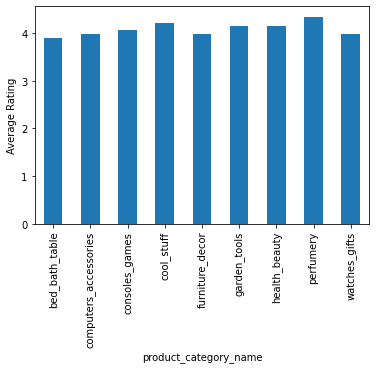

In [ ]:
avg_rating_by_cat.plot.bar()
plt.ylabel("Average Rating")

plt.show()

#### Average ratings for each product categories are about the same. All categories have average ratings above 3.9 which means the customers are generally satisfied by their purchases regardless of price or product.

### Explore sales data per year

In [ ]:
sales_data_by_yr = pd.DataFrame(sales_df.groupby(["year"])[["qty_sold", "total_price", "no_customers"]].sum())

sales_data_by_yr = sales_data_by_yr.rename(columns={"qty_sold": "Sales Volume", "total_price": "Revenue", "no_customers": "Number of Customers"})

sales_data_by_yr.head()

,Sales Volume,Revenue,Number of Customers
year,,,
2017,4348,409583.28,21441
2018,5451,552167.82,33334


#### Sales volume, revenue and customer numbers were higher in 2018 than 2017
#### Our data is limited to 2 years.  Therefore, not many conclusions can be drawn by looking at sales year. Fortunately, the data is split into seasons and months, which could provide better grounds for a conclusion to be made.

### Explore relationships

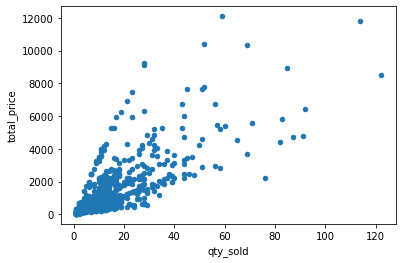

In [ ]:
sales_df.plot(kind="scatter", x="qty_sold", y="total_price")

plt.show()

##Initial Thoughts:
Majority of products have low quantities sold per month.  It does not look like there are any correlations between quantities sold and the total price.  A trendline is needed to make further evaluations.

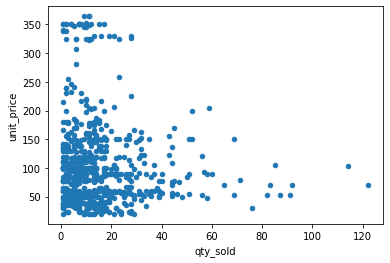

In [ ]:
sales_df.plot(kind="scatter", x="qty_sold", y="unit_price")

plt.show()

##Initial Thoughts:
A trendline is not needed to see that there is no relationship between quantity sold and unit price.  However, Like the previous scatter plot, we can see that a majority of the products have low quantities sold with some variance with unit price.

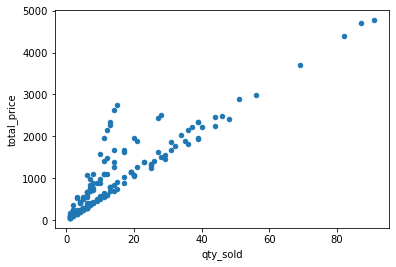

In [ ]:
# Test case 1: only using garden_tools category
garden_df = sales_df.loc[sales_df["product_category_name"]=="garden_tools"]

garden_df.plot(kind="scatter", x="qty_sold", y="total_price")

plt.show()

##Initial Thoughts:
From first glance, it could be easy to make the conclusion that there is a rather high chance of a linear relationship with quantity sold and total price for garden tools.  However, there are various data points that deviate from the trend.  I believe this could be due to the pricing and popularity of certain products.

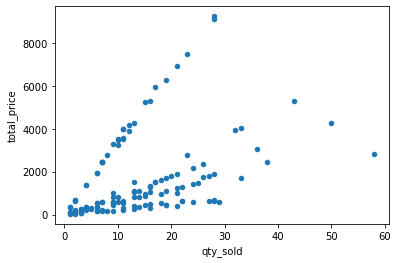

In [ ]:
# Test case 2: only using health_beauty category
health_df = sales_df.loc[sales_df["product_category_name"]=="health_beauty"]

health_df.plot(kind="scatter", x="qty_sold", y="total_price")

plt.show()

##Initial Thoughts:
The Health and Beauty has a much bigger spread than the garden tools.  In fact, products in this category has the highest difference in price points and quantities sold between each other.  

I believe this is also due to the pricing and popularity of the product.  For example, SKII is a very expensive product but it is also renowned for its effectiveness.  On the other hand, common brands like Cetaphil are also popular for its effectiveness but they are also much cheaper than a brand like SKII.

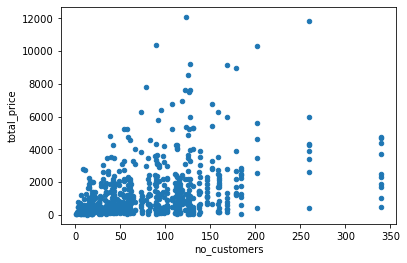

In [ ]:
sales_df.plot(kind="scatter", x="no_customers", y="total_price")

plt.show()